In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

In [2]:
import pandas as pd
import os

In [3]:
chartevents = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "CHARTEVENTS.csv.gz"))

KeyboardInterrupt: 

In [ ]:
chartevents.shape

In [ ]:
chartevents.describe

In [ ]:
# pickle.dump(final_mapping_lab_itemids, open("/Users/yanpavan/Desktop/d.pkl", "wb"))]
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))
final_mapping_lab_itemids

{50861: 'Alanine aminotransferase',
 769: 'Alanine aminotransferase',
 220644: 'Alanine aminotransferase',
 189: 'Fraction inspired oxygen',
 50878: 'Asparate aminotransferase',
 770: 'Asparate aminotransferase',
 220587: 'Asparate aminotransferase',
 50852: 'Hemoglobin percent',
 51224: 'Hemoglobin C',
 51225: 'Hemoglobin F',
 51223: 'Hemoglobin A2',
 51237: 'Prothrombin time INR',
 815: 'Prothrombin time INR',
 1530: 'Prothrombin time INR',
 227467: 'Prothrombin time INR',
 51465: 'Bilirubin',
 50883: 'Bilirubin, Direct',
 50884: 'Bilirubin, Indirect',
 50885: 'Bilirubin, Total',
 51049: 'Bilirubin, Total, Pleural',
 51028: 'Bilirubin, Total, Body Fluid',
 50838: 'Bilirubin, Total, Ascites',
 786: 'Calcium',
 1522: 'Calcium',
 3746: 'Calcium',
 51029: 'Calcium',
 50893: 'Calcium',
 225625: 'Calcium',
 3766: 'Calcium Ionized',
 50808: 'Calcium ionized',
 816: 'Calcium ionized',
 225667: 'Calcium ionized',
 51066: 'Calcium urine',
 51077: 'Calcium urine',
 791: 'Creatinine',
 1525: 'Cr

In [ ]:
final_itemids_list = list(final_mapping_lab_itemids.keys())
# chartevents.columns

In [ ]:
res_paths = []
count = 0
with pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "CHARTEVENTS.csv.gz"), chunksize=2_500_000) as reader:
    for chunk in reader:
        print(count, chunk.shape)
        path = os.path.join(data, "mimiciii", "1.4","preprocessed", "CHARTEVENTS", f"chartevents_with_mimic_extract_{count}.csv.gz")
        chunk = chunk[chunk.ITEMID.isin(final_itemids_list)]
        chunk["MIMICExtractName"] = chunk.apply(lambda r: final_mapping_lab_itemids[r["ITEMID"]], axis=1)
        chunk.to_csv(path)
        print(count, chunk.shape)
        res_paths.append(path)
        count += 1

0 (2500000, 15)
0 (98907, 16)
1 (2500000, 15)
1 (202352, 16)
2 (2500000, 15)
2 (98016, 16)


KeyboardInterrupt: 

In [ ]:
# chartevents[chartevents.isin(final_itemids_list)].to_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "CHARTEVENTS", "chartevents_with_mimic_extract.csv.gz"))

In [ ]:
chartevents["MIMICExtractName"] = chartevents.apply(lambda r: final_mapping_lab_itemids[r["ITEMID"]], axis=1)

In [ ]:
chartevents.to_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", f"chartevents_with_mimic_extract.csv.gz"))

In [1]:
t1=[('Furosemide', 'Lactic acid'), ('Ceftriaxone', 'PTT'), ('Insulin - Regular', 'Lactic acid'), ('Packed Red Blood Cells', 'Glucose'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Packed Red Blood Cells', 'Platelets'), ('Packed Red Blood Cells', 'Potassium'), ('Pantoprazole', 'Glucose'), ('Pantoprazole', 'Lactic acid'), ('Pantoprazole', 'Potassium'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Potassium serum'), ('Insulin - Regular', 'Sodium'), ('Haloperidol', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'), ('Furosemide', 'Calcium ionized'), ('Furosemide', 'Glucose'), ('Furosemide', 'Hemoglobin'), ('Furosemide', 'Potassium'), ('Packed Red Blood Cells', 'Calcium ionized'), ('Warfarin', 'Calcium ionized'), ('Warfarin', 'Potassium'), ('Ceftriaxone', 'Glucose'), ('Insulin - Regular', 'Calcium ionized'), ('Insulin - Regular', 'PTT'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Prothrombin time INR'), ('Packed Red Blood Cells', 'Creatinine'), ('Packed Red Blood Cells', 'Lactic acid'), ('Packed Red Blood Cells', 'Magnesium'), ('Packed Red Blood Cells', 'Sodium'), ('Pantoprazole', 'Calcium ionized'), ('Pantoprazole', 'Hemoglobin'), ('Pantoprazole', 'Alanine aminotransferase'), ('Pantoprazole', 'Asparate aminotransferase'), ('Pantoprazole', 'Bilirubin'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'PTT'), ('Pantoprazole', 'Platelets'), ('Pantoprazole', 'Potassium serum'), ('Pantoprazole', 'Prothrombin time INR'), ('Pantoprazole', 'Sodium'), ('Insulin - Regular', 'Alanine aminotransferase'), ('Insulin - Regular', 'Asparate aminotransferase'), ('Insulin - Regular', 'Bilirubin'), ('Insulin - Regular', 'Calcium'), ('Packed Red Blood Cells', 'Bilirubin'), ('Pantoprazole', 'Magnesium'), ('Packed Red Blood Cells', 'PTT'), ('Packed Red Blood Cells', 'Potassium serum'), ('Furosemide', 'Magnesium'), ('Furosemide', 'Potassium serum'), ('Ceftriaxone', 'Calcium ionized'), ('Ceftriaxone', 'Lactic acid'), ('Ceftriaxone', 'Potassium'), ('Ceftriaxone', 'Sodium'), ('Ceftriaxone', 'Calcium'), ('Ceftriaxone', 'Creatinine'), ('Ceftriaxone', 'Magnesium'), ('Ceftriaxone', 'Potassium serum'), ('Furosemide', 'Calcium'), ('Furosemide', 'Creatinine'), ('Furosemide', 'Sodium'), ('Warfarin', 'Glucose'), ('Omeprazole', 'Glucose'), ('Furosemide', 'Platelets'), ('Packed Red Blood Cells', 'Prothrombin time INR'), ('Insulin - Regular', 'Magnesium'), ('Furosemide', 'PTT'), ('Furosemide', 'Prothrombin time INR'), ('Ceftriaxone', 'Hemoglobin'), ('Ceftriaxone', 'Platelets'), ('Packed Red Blood Cells', 'Calcium'), ('Furosemide', 'Bilirubin'), ('Haloperidol', 'Creatinine'), ('Haloperidol', 'Lactic acid'), ('Haloperidol', 'Potassium'), ('Haloperidol', 'Potassium serum'), ('Haloperidol', 'Sodium'), ('Omeprazole', 'Sodium'), ('Warfarin', 'PTT'), ('Packed Red Blood Cells', 'Alanine aminotransferase'), ('Packed Red Blood Cells', 'Asparate aminotransferase'), ('Omeprazole', 'Calcium'), ('Omeprazole', 'Creatinine'), ('Omeprazole', 'Hemoglobin'), ('Omeprazole', 'Platelets'), ('Haloperidol', 'Calcium ionized'), ('Haloperidol', 'Magnesium'), ('Omeprazole', 'Potassium serum'), ('Ceftriaxone', 'Prothrombin time INR'), ('Ceftriaxone', 'Bilirubin'), ('Ceftriaxone', 'Alanine aminotransferase'), ('Ceftriaxone', 'Asparate aminotransferase'), ('Ceftriaxone', 'Hemoglobin percent'), ('Omeprazole', 'Calcium ionized'), ('Omeprazole', 'Potassium'), ('Haloperidol', 'Calcium'), ('Pantoprazole', 'Lipase'), ('Omeprazole', 'PTT'), ('Omeprazole', 'Prothrombin time INR'), ('Furosemide', 'Alanine aminotransferase'), ('Furosemide', 'Asparate aminotransferase'), ('Ceftriaxone', 'Creatinine urine'), ('Ceftriaxone', 'Potassium, Urine'), ('Ceftriaxone', 'Sodium, Urine'), ('Haloperidol', 'Hemoglobin'), ('Haloperidol', 'PTT'), ('Haloperidol', 'Platelets'), ('Haloperidol', 'Prothrombin time INR'), ('Warfarin', 'Magnesium'), ('Furosemide', 'Uric Acid'), ('Packed Red Blood Cells', 'Uric Acid'), ('Packed Red Blood Cells', 'Amylase'), ('Packed Red Blood Cells', 'Lipase'), ('Furosemide', 'Amylase'), ('Furosemide', 'Lipase'), ('Pantoprazole', 'Uric Acid'), ('Omeprazole', 'Magnesium'), ('Warfarin', 'Prothrombin time INR'), ('Pantoprazole', 'Amylase'), ('Omeprazole', 'Alanine aminotransferase'), ('Omeprazole', 'Asparate aminotransferase'), ('Omeprazole', 'Bilirubin'), ('Omeprazole', 'Lipase'), ('Warfarin', 'Calcium'), ('Warfarin', 'Creatinine'), ('Warfarin', 'Potassium serum'), ('Warfarin', 'Sodium'), ('Omeprazole', 'Lactic acid'), ('Warfarin', 'Hemoglobin'), ('Warfarin', 'Platelets'), ('Procainamide', 'PTT'), ('Procainamide', 'Prothrombin time INR'), ('Pantoprazole', 'Creatinine urine'), ('Pantoprazole', 'Potassium, Urine'), ('Pantoprazole', 'Sodium, Urine'), ('Insulin - Regular', 'Amylase'), ('Insulin - Regular', 'Lipase'), ('Omeprazole', 'Uric Acid'), ('Procainamide', 'Glucose'), ('Procainamide', 'Hemoglobin'), ('Procainamide', 'Potassium'), ('Procainamide', 'Sodium'), ('Procainamide', 'Calcium'), ('Procainamide', 'Creatinine'), ('Procainamide', 'Magnesium'), ('Procainamide', 'Potassium serum'), ('Furosemide', 'Creatinine urine'), ('Furosemide', 'Sodium, Urine'), ('Insulin - Regular', 'Glucose urine'), ('Procainamide', 'Platelets'), ('Warfarin', 'Lactic acid'), ('Pantoprazole', 'Vitamin B12'), ('Pantoprazole', 'Hemoglobin percent'), ('Haloperidol', 'Alanine aminotransferase'), ('Haloperidol', 'Asparate aminotransferase'), ('Haloperidol', 'Bilirubin'), ('Haloperidol', 'Lipase'), ('Packed Red Blood Cells', 'Creatinine urine'), ('Packed Red Blood Cells', 'Sodium, Urine'), ('Warfarin', 'Alanine aminotransferase'), ('Warfarin', 'Amylase'), ('Warfarin', 'Asparate aminotransferase'), ('Warfarin', 'Bilirubin'), ('Warfarin', 'Lipase'), ('Insulin - Regular', 'Creatinine urine'), ('Insulin - Regular', 'Sodium, Urine'), ('Insulin - Regular', 'Uric Acid'), ('Insulin - Regular', 'Potassium, Urine'), ('Ceftriaxone', 'Glucose urine'), ('Ceftriaxone', 'Vitamin B12'), ('Omeprazole', 'Amylase'), ('Insulin - Regular', 'Glucose, Pleural'), ('Haloperidol', 'Amylase'), ('Insulin - Regular', 'Hemoglobin percent')]

In [2]:
t2 = [('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Ceftriaxone', 'Bilirubin'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Citalopram', 'Sodium'),
 ('Citalopram', 'Sodium, Ascites'),
 ('Citalopram', 'Sodium, Body Fluid'),
 ('Citalopram', 'Sodium, Pleural'),
 ('Citalopram', 'Sodium, Stool'),
 ('Citalopram', 'Sodium, Urine'),
 ('Clozapine', 'Platelets'),
 ('Clozapine', 'Large Platelets'),
 ('Dabigatran', 'PTT'),
 ('Esmoprazole', 'Vitamin B12'),
 ('Fluoxetine', 'Sodium'),
 ('Fluoxetine', 'Sodium, Ascites'),
 ('Fluoxetine', 'Sodium, Body Fluid'),
 ('Fluoxetine', 'Sodium, Pleural'),
 ('Fluoxetine', 'Sodium, Stool'),
 ('Fluoxetine', 'Sodium, Urine'),
 ('Furosemide', 'Magnesium'),
 ('Furosemide', 'Magnesium, Urine'),
 ('Glibenclamide', 'Glucose'),
 ('Glibenclamide', 'Glucose urine'),
 ('Glibenclamide', 'Glucose, CSF'),
 ('Glibenclamide', 'Estimated Actual Glucose'),
 ('Glibenclamide', 'Glucose, Urine'),
 ('Glibenclamide', 'Glucose, Pleural'),
 ('Glibenclamide', 'Glucose, Joint Fluid'),
 ('Glibenclamide', 'Glucose, Ascites'),
 ('Glibenclamide', 'Glucose, Body Fluid'),
 ('Glimepiride', 'Glucose'),
 ('Glimepiride', 'Glucose urine'),
 ('Glimepiride', 'Glucose, CSF'),
 ('Glimepiride', 'Estimated Actual Glucose'),
 ('Glimepiride', 'Glucose, Urine'),
 ('Glimepiride', 'Glucose, Pleural'),
 ('Glimepiride', 'Glucose, Joint Fluid'),
 ('Glimepiride', 'Glucose, Ascites'),
 ('Glimepiride', 'Glucose, Body Fluid'),
 ('Haloperidol', 'Prolactin'),
 ('Hydrochlorothiazide', 'Uric Acid'),
 ('Hydrochlorothiazide', 'Uric Acid, Urine'),
 ('Hydrochlorothiazide', 'Calcium'),
 ('Hydrochlorothiazide', 'Calcium ionized'),
 ('Hydrochlorothiazide', 'Calcium urine'),
 ('Metformin', 'Vitamin B12'),
 ('Metformin', 'Lactic acid'),
 ('Omeprazole', 'Vitamin B12'),
 ('Pantoprazole', 'Vitamin B12'),
 ('Paracetamole (acetaminophen)', 'Alanine aminotransferase'),
 ('Paroxetine', 'Sodium'),
 ('Paroxetine', 'Sodium, Ascites'),
 ('Paroxetine', 'Sodium, Body Fluid'),
 ('Paroxetine', 'Sodium, Pleural'),
 ('Paroxetine', 'Sodium, Stool'),
 ('Paroxetine', 'Sodium, Urine'),
 ('Procainamide', 'Fraction inspired oxygen'),
 ('Quetiapine', 'Prolactin'),
 ('Ramipril', 'Potassium'),
 ('Ramipril', 'Potassium serum'),
 ('Ramipril', 'Potassium, Body Fluid'),
 ('Ramipril', 'Potassium, Pleural'),
 ('Ramipril', 'Potassium, Stool'),
 ('Ramipril', 'Potassium, Urine'),
 ('Ramipril', 'Potassium, Ascites'),
 ('Rivaroxaban', 'Prothrombin time INR'),
 ('Spironolactone', 'Potassium'),
 ('Spironolactone', 'Potassium serum'),
 ('Spironolactone', 'Potassium, Body Fluid'),
 ('Spironolactone', 'Potassium, Pleural'),
 ('Spironolactone', 'Potassium, Stool'),
 ('Spironolactone', 'Potassium, Urine'),
 ('Spironolactone', 'Potassium, Ascites'),
 ('Trimetoprim-sulphamethoxazole', 'Creatinine'),
 ('Trimetoprim-sulphamethoxazole', 'Creatinine ascites'),
 ('Trimetoprim-sulphamethoxazole', 'Creatinine body fluid'),
 ('Trimetoprim-sulphamethoxazole', 'Creatinine pleural'),
 ('Trimetoprim-sulphamethoxazole', 'Creatinine urine'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium serum'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium, Body Fluid'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium, Pleural'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium, Stool'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium, Urine'),
 ('Trimetoprim-sulphamethoxazole', 'Potassium, Ascites'),
 ('Valproic acid', 'Amylase'),
 ('Valproic acid', 'Amylase, Ascites'),
 ('Valproic acid', 'Amylase, Body Fluid'),
 ('Valproic acid', 'Amylase, Joint Fluid'),
 ('Valproic acid', 'Amylase, Pleural'),
 ('Valproic acid', 'Amylase, Urine'),
 ('Valproic acid', 'Lipase'),
 ('Valproic acid', 'Lipase, Ascites'),
 ('Valproic acid', 'Lipase, Body Fluid'),
 ('Valsartan', 'Potassium'),
 ('Valsartan', 'Potassium serum'),
 ('Valsartan', 'Potassium, Body Fluid'),
 ('Valsartan', 'Potassium, Pleural'),
 ('Valsartan', 'Potassium, Stool'),
 ('Valsartan', 'Potassium, Urine'),
 ('Valsartan', 'Potassium, Ascites'),
 ('Warfarin', 'Prothrombin time INR'),
 ('Insulin - Regular', 'Glucose'),
 ('Insulin - Regular', 'Glucose urine'),
 ('Insulin - Regular', 'Glucose, CSF'),
 ('Insulin - Regular', 'Estimated Actual Glucose'),
 ('Insulin - Regular', 'Glucose, Urine'),
 ('Insulin - Regular', 'Glucose, Pleural'),
 ('Insulin - Regular', 'Glucose, Joint Fluid'),
 ('Insulin - Regular', 'Glucose, Ascites'),
 ('Insulin - Regular', 'Glucose, Body Fluid'),
 ('Packed Red Blood Cells', 'Hemoglobin percent'),
 ('Packed Red Blood Cells', 'Hemoglobin C'),
 ('Packed Red Blood Cells', 'Hemoglobin F'),
 ('Packed Red Blood Cells', 'Hemoglobin A2'),
 ('Packed Red Blood Cells', 'Hemoglobin'),
 ('Calcium', 'Calcium'),
 ('Calcium', 'Calcium ionized'),
 ('Calcium', 'Calcium urine')]

In [5]:
len(t1), len(t2)

(179, 129)

In [3]:
t1==t2

False

In [4]:
set(t2).difference(t1)

{('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Calcium', 'Calcium'),
 ('Calcium', 'Calcium ionized'),
 ('Calcium', 'Calcium urine'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Citalopram', 'Sodium'),
 ('Citalopram', 'Sodium, Ascites'),
 ('Citalopram', 'Sodium, Body Fluid'),
 ('Citalopram', 'Sodium, Pleural'),
 ('Citalopram', 'Sodium, Stool'),
 ('Citalopram', 'Sodium, Urine'),
 ('Clozapine', 'Large Platelets'),
 ('Clozapine', 'Platelets'),
 ('Dab

In [ ]:
med_lab_pairs_doc_path = "/Users/yanpavan/Downloads/list of medication lab interactions .xlsx"
d_m_l_doc = pd.read_excel(med_lab_pairs_doc_path)

In [ ]:
d_m_l_doc

,Medication,lab result,increased or decreased,"immediate (up to 2 hours), late (more than 2 hours)"
0,Ramipril,potassium,increased,immediate
1,Furosemide,magnesium,decreased,late
2,Hydrochlorothiazide,calcium,increased,late
3,Spironolactone,potassium,increased,immediate
4,Hydrochlorothiazide,Uric acid,increased,late
5,Omeprazole,B12,decreased,late
6,Pantoprazole,B12,decreased,late
7,Esmoprazole,B12,decreased,late
8,Metformin,B12,increased,late
9,Metformin,lactic acid,increased,immediate


## Merging Medication Labels

In [ ]:
m_p_df = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "med_patient_data.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_39050/2465958605.py:1: DtypeWarning: Columns (13,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  m_p_df = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "med_patient_data.csv"))


In [ ]:
m_p_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'ROW_ID_x',
       'SUBJECT_ID_x', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'ITEMID', 'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID',
       'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCOMPONENTTYPEDESCRIPTION',
       'ORDERCATEGORYDESCRIPTION', 'PATIENTWEIGHT', 'TOTALAMOUNT',
       'TOTALAMOUNTUOM', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON',
       'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY',
       'COMMENTS_DATE', 'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y',
       'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY

In [ ]:
res_dict_m_l = {}
for med in d_m_l_doc.Medication.unique():
    col_bool = m_p_df.LABEL.apply(lambda r: med.lower() in r.lower())
    res_dict_m_l[med] = m_p_df[col_bool]

In [ ]:
res_dict_m_l.keys()
# dict_keys(['Ramipril', 'Furosemide', 'Hydrochlorothiazide', 'Spironolactone', 'Omeprazole', 'Pantoprazole', 'Esmoprazole', 'Metformin', 'Amoxicilin-clavulanate', 'Acetylsalycilic acid (aspirin)', 'Trimetoprim-sulphamethoxazole', 'Paracetamole (acetaminophen)', 'Rivaroxaban ', 'Dabigatran', 'Warfarin', 'Clozapine', 'Paroxetine', 'Citalopram', 'Fluoxetine', 'Haloperidol', 'Quetiapine', 'Valsartan ', 'Simvastatin', 'Ceftriaxone', 'Valproic acid ', 'Glimepiride', 'Glibenclamide', 'Procainamide '])

dict_keys(['Ramipril', 'Furosemide', 'Hydrochlorothiazide', 'Spironolactone', 'Omeprazole', 'Pantoprazole', 'Esmoprazole', 'Metformin', 'Amoxicilin-clavulanate', 'Acetylsalycilic acid (aspirin)', 'Trimetoprim-sulphamethoxazole', 'Paracetamole (acetaminophen)', 'Rivaroxaban ', 'Dabigatran', 'Warfarin', 'Clozapine', 'Paroxetine', 'Citalopram', 'Fluoxetine', 'Haloperidol', 'Quetiapine', 'Valsartan ', 'Simvastatin', 'Ceftriaxone', 'Valproic acid ', 'Glimepiride', 'Glibenclamide', 'Procainamide '])

In [ ]:
res_d_itemids = {}
res_d_names = {}
for med in res_dict_m_l:
    if res_dict_m_l[med].shape[0]>0:
        res_d_itemids[med] = list(res_dict_m_l[med].ITEMID.unique())
        res_d_names[med] = list(res_dict_m_l[med].LABEL.unique())

In [ ]:
res_d_itemids

{'Furosemide': [221794, 228340],
 'Omeprazole': [227694],
 'Pantoprazole': [225910],
 'Warfarin': [225913],
 'Haloperidol': [221824],
 'Ceftriaxone': [225855]}

In [ ]:
res_d_names = {}

{'Furosemide': ['Furosemide (Lasix)', 'Furosemide (Lasix) 500/100'],
 'Omeprazole': ['Omeprazole (Prilosec)'],
 'Pantoprazole': ['Pantoprazole (Protonix)'],
 'Warfarin': ['Coumadin (Warfarin)'],
 'Haloperidol': ['Haloperidol (Haldol)'],
 'Ceftriaxone': ['Ceftriaxone']}

In [ ]:
med_lab_pairs_mimic_extract_doc_path = "/Users/yanpavan/Desktop/itemid_to_variable_map.csv"
d_itemid_var = pd.read_csv(med_lab_pairs_mimic_extract_doc_path)

In [ ]:
d_itemid_var

,LEVEL2,LEVEL1,ALTERNATIVE,STATUS,STATUS NOTE,ITEMID,MIMIC LABEL,UNITNAME,LINKSTO,COUNT,CATEGORY,CONCEPTID,FLUID,LOINC_CODE,DBSOURCE,Unnamed: 15,PARAM_TYPE,NOTE
0,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,50861,ALANINE AMINOTRANSFERASE (ALT),NaN,labevents,219475.0,CHEMISTRY,NaN,BLOOD,,NaN,NaN,NaN,NaN
1,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,769,ALT,NaN,chartevents,41594.0,Enzymes,NaN,NaN,NaN,carevue,NaN,NaN,NaN
2,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,220644,ALT,None,chartevents,37625.0,Labs,NaN,NaN,NaN,metavision,NaN,Numeric,NaN
3,Albumin,Albumin,NaN,ready,NaN,50862,ALBUMIN,NaN,labevents,146697.0,CHEMISTRY,NaN,BLOOD,1751-7,NaN,NaN,NaN,NaN
4,Albumin,Albumin,NaN,ready,NaN,772,Albumin (>3.2),NaN,chartevents,31022.0,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,Urine output,Urine output,NaN,ready,NaN,226565,L Nephrostomy,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13247,Urine output,Urine output,NaN,ready,NaN,226567,Straight Cath,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13248,Urine output,Urine output,NaN,ready,NaN,226584,Ileoconduit,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13249,Urine output,Urine output,OR Urine,ready,NaN,226627,OR Urine,mL,outputevents,5928.0,Output,NaN,NaN,NaN,metavision,NaN,NaN,NaN


In [ ]:
res_dict_m_l = {}
for med in d_m_l_doc.Medication.unique():
    col_bool = d_itemid_var.apply(lambda r: (med.lower() in str(r["LEVEL2"]).lower()) or (med.lower() in str(r["LEVEL1"]).lower()) or (med.lower() in str(r["MIMIC LABEL"]).lower()), axis=1)
    res_dict_m_l[med] = d_itemid_var[col_bool]

In [ ]:
for med in res_dict_m_l:
    if res_dict_m_l[med].shape[0]>0:
        if med in res_d_itemids and med in res_d_names:
            res_d_itemids[med].extend(list(res_dict_m_l[med].ITEMID.unique()))
            res_d_names[med].extend(list(res_dict_m_l[med]["MIMIC LABEL"].unique()))
        else:
            res_d_itemids[med] = list(res_dict_m_l[med].ITEMID.unique())
            res_d_names[med] = list(res_dict_m_l[med]["MIMIC LABEL"].unique())

In [ ]:
res_d_itemids

{'Furosemide': [221794, 228340, 3439, 221794, 228340],
 'Omeprazole': [227694, 7745, 7252, 227694],
 'Pantoprazole': [225910,
  1097,
  2778,
  1898,
  1226,
  6756,
  6616,
  8074,
  6741,
  7372,
  40550,
  40700,
  41583,
  44820,
  46014,
  46203,
  46522,
  46548,
  46565,
  225910],
 'Warfarin': [225913, 225913],
 'Haloperidol': [221824, 221824],
 'Ceftriaxone': [225855, 90018, 225855],
 'Spironolactone': [5962, 6296],
 'Procainamide ': [50962, 45853]}

In [ ]:
mapping_final_res = {k: [i for i in zip(items, names)] for k, items, names in zip( res_d_itemids.keys(), res_d_itemids.values(), res_d_names.values())}

In [ ]:
mapping_final_res

{'Furosemide': [(221794, 'Furosemide (Lasix)'),
  (228340, 'Furosemide (Lasix) 500/100'),
  (3439, 'Furosemide/Lasix'),
  (221794, 'Furosemide (Lasix)'),
  (228340, 'Furosemide (Lasix) 500/100')],
 'Omeprazole': [(227694, 'Omeprazole (Prilosec)'),
  (7745, 'Omeprazole'),
  (7252, 'omeprazole'),
  (227694, 'Omeprazole (Prilosec)')],
 'Pantoprazole': [(225910, 'Pantoprazole (Protonix)'),
  (1097, 'Pantoprazole  mg/hr'),
  (2778, 'Pantoprazole'),
  (1898, 'pantoprazole'),
  (1226, 'Pantoprazole mg/hr'),
  (6756, 'pantoprazole80mg/100'),
  (6616, 'Pantoprazole   mg/hr'),
  (8074, 'pantoprazole80/250'),
  (6741, 'pantoprazole mgm/hr'),
  (7372, 'PANTOPRAZOLE'),
  (40550, 'pantoprazole gtt'),
  (40700, 'PANTOPRAZOLE GTT'),
  (41583, 'pantoprazole 8mg/hr'),
  (44820, 'Pantoprazole 8mg/hr'),
  (46014, 'Pantoprazole gtt'),
  (46203, 'pantoprazole mg/hr'),
  (46522, 'Pantoprazole (Protonix)')],
 'Warfarin': [(225913, 'Coumadin (Warfarin)'),
  (225913, 'Coumadin (Warfarin)')],
 'Haloperidol': [(2

In [ ]:
med_itemid_mapping = m_p_df.groupby(["ITEMID", "LABEL"]).count()[["SUBJECT_ID_x"]].reset_index()

In [ ]:
med_itemid_mapping.loc[med_itemid_mapping["ITEMID"]==220862]["LABEL"][0]

'Albumin 25%'

In [ ]:
# d_m_l_doc["Medication ITEMIDs"] = d_m_l_doc.Medication.apply(lambda r: list(set(res_d_itemids[r])) if r in res_d_itemids else [])
# d_m_l_doc["Medication MIMIC Labels"] = d_m_l_doc.Medication.apply(lambda r: list(set(res_d_names[r])) if r in res_d_names else [])

In [ ]:
d_m_l_doc["Medication Doc<>MIMIC Mapping"] = d_m_l_doc.Medication.apply(lambda r: mapping_final_res[r] if r in mapping_final_res else [])

In [ ]:
221794 in med_itemid_mapping["ITEMID"]

False

In [ ]:
med_itemid_mapping["ITEMID"]

0      220862
1      220864
2      220949
3      220950
4      220952
        ...  
273    228361
274    228363
275    228364
276    228367
277    228383
Name: ITEMID, Length: 278, dtype: int64

In [ ]:
list(m_p_df[m_p_df["ITEMID"]==228383]["LABEL"].value_counts().to_dict().keys())[0]

'Peptamen Bariatric (Full)'

In [ ]:
def get_final_dict(itemids, med_mapping):
    i_map = [k[0] for k in med_mapping]
    t_map = m_p_df["ITEMID"].value_counts().to_dict()
    func = lambda i: list(m_p_df[m_p_df["ITEMID"]==228383]["LABEL"].value_counts().to_dict().keys())[0] if i in t_map else None
    # if len(itemids)>=1:
    #     print(itemids[0])
    #     print(func(itemids[0]))
    map = [(i, func(i)) for i in itemids if i not in i_map or func(i) is not None]
    print(map)
    return map+med_mapping


In [ ]:
d_m_l_doc["ITEMID_with_manual"] = d_m_l_doc.apply(lambda r: [int(val.strip()) for val in r["ITEMID_with_manual"][1:-1].split(',') if val is not ''], axis=1)

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_39050/878652254.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  d_m_l_doc["ITEMID_with_manual"] = d_m_l_doc.apply(lambda r: [int(val.strip()) for val in r["ITEMID_with_manual"][1:-1].split(',') if val is not ''], axis=1)


In [ ]:
d_m_l_doc['Medication Doc<>MIMIC Mapping with Manual'] = d_m_l_doc.apply(lambda r : get_final_dict(r['ITEMID_with_manual'], r['Medication Doc<>MIMIC Mapping']), axis=1)

[]
[(221794, 'Peptamen Bariatric (Full)'), (228340, 'Peptamen Bariatric (Full)')]
[]
[]
[]
[(227694, 'Peptamen Bariatric (Full)')]
[(46548, None), (46565, None), (225910, 'Peptamen Bariatric (Full)')]
[]
[]
[]
[]
[]
[(7325, None)]
[(7325, None)]
[]
[]
[(50856, None)]
[]
[]
[(225913, 'Peptamen Bariatric (Full)')]
[]
[]
[]
[]
[(221824, 'Peptamen Bariatric (Full)')]
[]
[]
[]
[(225855, 'Peptamen Bariatric (Full)')]
[]
[]
[]
[]
[]


In [ ]:
res_i = []
for i in d_m_l_doc["ITEMID_with_manual"]:
    res_i.extend(i)

In [ ]:
# d_m_l_doc

,Medication,lab result,increased or decreased,"immediate (up to 2 hours), late (more than 2 hours)",Medication ITEMIDs,Medication MIMIC Labels,ITEMID_with_manual,Medication Doc<>MIMIC Mapping,Medication Doc<>MIMIC Mapping with Manual
0,Ramipril,potassium,increased,immediate,[],[],[],[],[]
1,Furosemide,magnesium,decreased,late,"[221794, 228340, 3439]","['Furosemide/Lasix', 'Furosemide (Lasix)', 'Fu...","[221794, 228340, 3439]","[(221794, Furosemide (Lasix)), (228340, Furose...","[(221794, Peptamen Bariatric (Full)), (228340,..."
2,Hydrochlorothiazide,calcium,increased,late,[],[],[],[],[]
3,Spironolactone,potassium,increased,immediate,"[6296, 5962]","['spironolactone', 'Spironolactone']","[6296, 5962]","[(5962, Spironolactone), (6296, spironolactone)]","[(5962, Spironolactone), (6296, spironolactone)]"
4,Hydrochlorothiazide,Uric acid,increased,late,[],[],[],[],[]
5,Omeprazole,B12,decreased,late,"[7745, 7252, 227694]","['omeprazole', 'Omeprazole (Prilosec)', 'Omepr...","[7745, 7252, 227694]","[(227694, Omeprazole (Prilosec)), (7745, Omepr...","[(227694, Peptamen Bariatric (Full)), (227694,..."
6,Pantoprazole,B12,decreased,late,"[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","['PANTOPRAZOLE', 'pantoprazole80mg/100', 'Pant...","[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","[(225910, Pantoprazole (Protonix)), (1097, Pan...","[(46548, None), (46565, None), (225910, Peptam..."
7,Esmoprazole,B12,decreased,late,[],[],[],[],[]
8,Metformin,B12,increased,late,[],[],[],[],[]
9,Metformin,lactic acid,increased,immediate,[],[],[],[],[]


In [ ]:
# d_m_l_doc.to_excel(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc_2.xlsx"))

In [ ]:
d_m_l_doc_excel = pd.read_excel(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.xlsx"))

In [ ]:
d_m_l_doc_excel

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,Manual,Automated,NaN
1,NaN,NaN,Medication,lab result,increased or decreased,"immediate (up to 2 hours), late (more than 2 h...",Medication ITEMIDs,Medication ITEMIDs,Medication MIMIC Labels
2,NaN,0.0,Ramipril,potassium,increased,immediate,NaN,[],[]
3,NaN,1.0,Furosemide,magnesium,decreased,late,NaN,"[221794, 228340, 3439]","['Furosemide/Lasix', 'Furosemide (Lasix)', 'Fu..."
4,NaN,2.0,Hydrochlorothiazide,calcium,increased,late,NaN,[],[]
5,NaN,3.0,Spironolactone,potassium,increased,immediate,NaN,"[6296, 5962]","['spironolactone', 'Spironolactone']"
6,NaN,4.0,Hydrochlorothiazide,Uric acid,increased,late,NaN,[],[]
7,NaN,5.0,Omeprazole,B12,decreased,late,NaN,"[7745, 7252, 227694]","['omeprazole', 'Omeprazole (Prilosec)', 'Omepr..."
8,NaN,6.0,Pantoprazole,B12,decreased,late,NaN,"[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","['PANTOPRAZOLE', 'pantoprazole80mg/100', 'Pant..."
9,NaN,7.0,Esmoprazole,B12,decreased,late,NaN,[],[]


In [ ]:
map_small_manual_work = {'Procainamide':[50972, 30052],
'Valproic acid':[51008, 6148, 2570],
'Paracetamole (acetaminophen)':[50856],
'Acetylsalycilic acid (aspirin)':[7325]}

In [ ]:
map_small_manual_work

{'Procainamide': [50972, 30052],
 'Valproic acid': [51008, 6148, 2570],
 'Paracetamole (acetaminophen)': [50856],
 'Acetylsalycilic acid (aspirin)': [7325]}

In [ ]:
d_m_l_doc["ITEMID_with_manual"] = d_m_l_doc.apply(lambda r: list(set(r["Medication ITEMIDs"]+map_small_manual_work[r["Medication"]])) if r["Medication"] in map_small_manual_work else r["Medication ITEMIDs"], axis=1)

In [ ]:
d_m_l_doc

,Medication,lab result,increased or decreased,"immediate (up to 2 hours), late (more than 2 hours)",Medication ITEMIDs,Medication MIMIC Labels,ITEMID_with_manual
0,Ramipril,potassium,increased,immediate,[],[],[]
1,Furosemide,magnesium,decreased,late,"[221794, 228340, 3439]","[Furosemide/Lasix, Furosemide (Lasix), Furosem...","[221794, 228340, 3439]"
2,Hydrochlorothiazide,calcium,increased,late,[],[],[]
3,Spironolactone,potassium,increased,immediate,"[6296, 5962]","[spironolactone, Spironolactone]","[6296, 5962]"
4,Hydrochlorothiazide,Uric acid,increased,late,[],[],[]
5,Omeprazole,B12,decreased,late,"[7745, 7252, 227694]","[omeprazole, Omeprazole (Prilosec), Omeprazole]","[7745, 7252, 227694]"
6,Pantoprazole,B12,decreased,late,"[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","[PANTOPRAZOLE, pantoprazole80mg/100, Pantopraz...","[8074, 44820, 46522, 46014, 1097, 1226, 7372, ..."
7,Esmoprazole,B12,decreased,late,[],[],[]
8,Metformin,B12,increased,late,[],[],[]
9,Metformin,lactic acid,increased,immediate,[],[],[]


In [ ]:
d_m_l_doc

,Medication,lab result,increased or decreased,"immediate (up to 2 hours), late (more than 2 hours)",Medication ITEMIDs,Medication MIMIC Labels,ITEMID_with_manual,Medication Doc<>MIMIC Mapping,Medication Doc<>MIMIC Mapping with Manual
0,Ramipril,potassium,increased,immediate,[],[],[],[],[]
1,Furosemide,magnesium,decreased,late,"[221794, 228340, 3439]","['Furosemide/Lasix', 'Furosemide (Lasix)', 'Fu...","[221794, 228340, 3439]","[(221794, Furosemide (Lasix)), (228340, Furose...","[(221794, Peptamen Bariatric (Full)), (228340,..."
2,Hydrochlorothiazide,calcium,increased,late,[],[],[],[],[]
3,Spironolactone,potassium,increased,immediate,"[6296, 5962]","['spironolactone', 'Spironolactone']","[6296, 5962]","[(5962, Spironolactone), (6296, spironolactone)]","[(5962, Spironolactone), (6296, spironolactone)]"
4,Hydrochlorothiazide,Uric acid,increased,late,[],[],[],[],[]
5,Omeprazole,B12,decreased,late,"[7745, 7252, 227694]","['omeprazole', 'Omeprazole (Prilosec)', 'Omepr...","[7745, 7252, 227694]","[(227694, Omeprazole (Prilosec)), (7745, Omepr...","[(227694, Peptamen Bariatric (Full)), (227694,..."
6,Pantoprazole,B12,decreased,late,"[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","['PANTOPRAZOLE', 'pantoprazole80mg/100', 'Pant...","[8074, 44820, 46522, 46014, 1097, 1226, 7372, ...","[(225910, Pantoprazole (Protonix)), (1097, Pan...","[(46548, None), (46565, None), (225910, Peptam..."
7,Esmoprazole,B12,decreased,late,[],[],[],[],[]
8,Metformin,B12,increased,late,[],[],[],[],[]
9,Metformin,lactic acid,increased,immediate,[],[],[],[],[]


In [ ]:
d_m_l_doc.to_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv"))

In [ ]:
m_p_df[m_p_df.ITEMID.isin(med_itemids)].groupby(["LABEL","ITEMID"]).count()[["HADM_ID"]]

,,HADM_ID
LABEL,ITEMID,
Ceftriaxone,225855,4749
Coumadin (Warfarin),225913,997
Furosemide (Lasix),221794,47444
Furosemide (Lasix) 500/100,228340,2392
Haloperidol (Haldol),221824,5389
Procainamide,222151,51


In [ ]:
d_itemid_var[d_itemid_var.ITEMID.isin(med_itemids)].groupby(["MIMIC LABEL","ITEMID"]).nth(0)[["ALTERNATIVE"]]

,,ALTERNATIVE
MIMIC LABEL,ITEMID,
ACETAMINOPHEN,50856,NaN
CEFTRIAXONE,90018,NaN
Ceftriaxone,225855,Ceftriaxone
Coumadin (Warfarin),225913,Coumadin (Warfarin)
Furosemide (Lasix),221794,Furosemide (Lasix)
Furosemide (Lasix) 500/100,228340,Furosemide (Lasix) 500/100
Furosemide/Lasix,3439,NaN
Haloperidol (Haldol),221824,Haloperidol (Haldol)
N-ACETYLPROCAINAMIDE (NAPA),50962,NaN


In [ ]:
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_39050/3975426906.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))


In [ ]:
labs = labs.drop(columns=["Unnamed: 0"])

In [ ]:
'AGE' in labs.columns

True

In [ ]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [ ]:
labs = labs[labs["AGE"]<100]

In [ ]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [ ]:
meds = []
labtests = []

meds.append("Furosemide (Lasix)")
labtests.append("Magnesium")

meds.append("Furosemide (Lasix)")
labtests.append("Magnesium, Urine")

meds.append("Furosemide (Lasix) 500/100")
labtests.append("Magnesium")

meds.append("Furosemide (Lasix) 500/100")
labtests.append("Magnesium, Urine")

meds.append("Ceftriaxone")
labtests.append("Bilirubin, Direct")
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Indirect')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Ascites')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Body Fluid')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Pleural')

meds.append("Haloperidol (Haldol)")
labtests.append('Prolactin')

meds.append("Coumadin (Warfarin)")
labtests.append('INR(PT)')

meds.append("Procainamide")
labtests.append('Anticardiolipin Antibody IgG')

meds.append("Procainamide")
labtests.append('Anticardiolipin Antibody IgM')

[k for k in zip(meds, labtests)]


[('Furosemide (Lasix)', 'Magnesium'),
 ('Furosemide (Lasix)', 'Magnesium, Urine'),
 ('Furosemide (Lasix) 500/100', 'Magnesium'),
 ('Furosemide (Lasix) 500/100', 'Magnesium, Urine'),
 ('Ceftriaxone', 'Bilirubin, Direct'),
 ('Ceftriaxone', 'Bilirubin, Indirect'),
 ('Ceftriaxone', 'Bilirubin, Total'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Haloperidol (Haldol)', 'Prolactin'),
 ('Coumadin (Warfarin)', 'INR(PT)'),
 ('Procainamide', 'Anticardiolipin Antibody IgG'),
 ('Procainamide', 'Anticardiolipin Antibody IgM')]

In [ ]:
{(lab, labs.loc[labs["LABEL"]==lab].iloc[0].ITEMID): labs.loc[labs["LABEL"]==lab].ITEMID.value_counts()[labs.loc[labs["LABEL"]==lab].iloc[0].ITEMID] for lab in labtests}

{('Magnesium', 50960): 218551,
 ('Magnesium, Urine', 51088): 182,
 ('Bilirubin, Direct', 50883): 4690,
 ('Bilirubin, Indirect', 50884): 4408,
 ('Bilirubin, Total', 50885): 61895,
 ('Bilirubin, Total, Ascites', 50838): 278,
 ('Bilirubin, Total, Body Fluid', 51028): 72,
 ('Bilirubin, Total, Pleural', 51049): 34,
 ('Prolactin', 50973): 108,
 ('INR(PT)', 51237): 132696,
 ('Anticardiolipin Antibody IgG', 51138): 218,
 ('Anticardiolipin Antibody IgM', 51139): 218}

In [ ]:
lab_names = list(d_m_l_doc["lab result"].unique())

In [ ]:
v_lab = {}
for lab in lab_names:
    v_lab[lab] = labs[labs["LABEL"].apply(lambda r : lab.lower() in r.lower())]

In [ ]:
lab_names

['potassium',
 'magnesium ',
 'calcium',
 'Uric acid',
 'B12',
 'lactic acid',
 'ALT',
 'AST',
 'Hemoglobin ',
 'platelets',
 'creatinine',
 'INR',
 'Aptt',
 'sodium',
 'prolactin',
 'CPK',
 'bilirubin ',
 'Amylase',
 'Lipase',
 'glucose',
 'ANA']

In [ ]:
v_r_lab_dict = {}
for lab_name in lab_names:
    v_r_lab_dict[lab_name] = v_lab[lab_name].groupby(["LABEL", "ITEMID"]).count()[["SUBJECT_ID"]].to_dict()["SUBJECT_ID"]


In [ ]:
# v_r_lab_dict = {k.strip():v for k, v in v_r_lab_dict.items()}
# pickle.dump(v_r_lab_dict, open(os.path.join(data, "mapping_lab_itemids.pkl"), "wb"))

In [ ]:
def get_name(mimic_name, index):
    index
    pass

In [ ]:
'Bilirubin, Total, Ascites' in labs["LABEL"]

False

In [ ]:
t_lab_names_t = [('Ceftriaxone', 'Bilirubin, Direct'),
 ('Ceftriaxone', 'Bilirubin, Indirect'),
 ('Ceftriaxone', 'Bilirubin, Total'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural')]
 [(lab[1], get_name(lab[1], )) for lab in t_lab_names_t]

In [ ]:
# v_r_lab_dict = {'potassium': {('Potassium', 50971): 248358,
#   ('Potassium, Ascites', 50847): 20,
#   ('Potassium, Body Fluid', 51041): 17,
#   ('Potassium, Pleural', 51057): 2,
#   ('Potassium, Stool', 51064): 25,
#   ('Potassium, Urine', 51097): 5973,
#   ('Potassium, Whole Blood', 50822): 47959},
#  'magnesium ': {
#   ('Magnesium', 50960): 218551,
#  ('Magnesium, Urine', 51088): 182
#  },
#  'calcium': {
#   # ('24 hr Calcium', 51066): 7,
#   ('Calcium, Body Fluid', 51029): 3,
#   ('Calcium, Total', 50893): 197310,
#   ('Calcium, Urine', 51077): 302,
#   # ('Free Calcium', 50808): 74269
#   },
#  'Uric acid': {('Uric Acid', 51007): 4657, ('Uric Acid, Urine', 51105): 218},
#  'B12': {('Vitamin B12', 51010): 2029},
#  'lactic acid': {},
#  'ALT': {('Alanine Aminotransferase (ALT)', 50861): 61350},
#  'AST': {('Asparate Aminotransferase (AST)', 50878): 61317},
#  'Hemoglobin': {('% Hemoglobin A1c', 50852): 2943,
#   ('Hemoglobin A2', 51223): 15,
#   ('Hemoglobin C', 51224): 30,
#   ('Hemoglobin F', 51225): 4},
#  'platelets': {('Large Platelets', 51240): 2},
#  'creatinine': {
#   # ('24 hr Creatinine', 51067): 182,
#   # ('Albumin/Creatinine, Urine', 51070): 145,
#   # ('Amylase/Creatinine Ratio, Urine', 51073): 11,
#   ('Creatinine', 50912): 233274,
#   # ('Creatinine Clearance', 51080): 22,
#   ('Creatinine, Ascites', 50841): 206,
#   ('Creatinine, Body Fluid', 51032): 48,
#   ('Creatinine, Pleural', 51052): 104,
#   ('Creatinine, Serum', 51081): 23,
#   ('Creatinine, Urine', 51082): 9226,
#   # ('Protein/Creatinine Ratio', 51099): 1046,
#   ('Urine Creatinine', 51106): 23},
#  'INR': {('INR(PT)', 51237): 132696},
#  'Aptt': {},
#  'sodium': {('Sodium', 50983): 244294,
#   ('Sodium, Ascites', 50848): 22,
#   ('Sodium, Body Fluid', 51042): 17,
#   ('Sodium, Pleural', 51058): 4,
#   ('Sodium, Stool', 51065): 25,
#   ('Sodium, Urine', 51100): 8113,
#   ('Sodium, Whole Blood', 50824): 20176},
#  'prolactin': {('Prolactin', 50973): 108},
#  'CPK': {},
#  'bilirubin': {
#  ('Bilirubin, Direct', 50883): 4690,
#  ('Bilirubin, Indirect', 50884): 4408,
#  ('Bilirubin, Total', 50885): 61895,
#  ('Bilirubin, Total, Ascites', 50838): 278,
#  ('Bilirubin, Total, Body Fluid', 51028): 72,
#  ('Bilirubin, Total, Pleural', 51049): 34
#  },
#  'Amylase': {('Amylase', 50867): 9995,
#   ('Amylase, Ascites', 50836): 378,
#   ('Amylase, Body Fluid', 51026): 219,
#   ('Amylase, Joint Fluid', 51020): 3,
#   ('Amylase, Pleural', 51047): 237,
#   ('Amylase, Urine', 51072): 11,
#   # ('Amylase/Creatinine Ratio, Urine', 51073): 11
#   },
#  'Lipase': {('Lipase', 50956): 11408,
#   ('Lipase, Ascites', 50844): 2,
#   ('Lipase, Body Fluid', 51036): 4},
#  'glucose': {('Estimated Actual Glucose', 51529): 12,
#   ('Glucose', 50809): 51150,
#   ('Glucose', 50931): 226172,
#   ('Glucose', 51478): 2118,
#   ('Glucose, Ascites', 50842): 409,
#   ('Glucose, Body Fluid', 51034): 157,
#   ('Glucose, CSF', 51014): 905,
#   ('Glucose, Joint Fluid', 51022): 5,
#   ('Glucose, Pleural', 51053): 708,
#   ('Glucose, Urine', 51084): 17},
#  'ANA': {}}

In [ ]:
v_r_lab_dict

{'potassium': {('Potassium', 50971): 248358,
  ('Potassium, Ascites', 50847): 20,
  ('Potassium, Body Fluid', 51041): 17,
  ('Potassium, Pleural', 51057): 2,
  ('Potassium, Stool', 51064): 25,
  ('Potassium, Urine', 51097): 5973,
  ('Potassium, Whole Blood', 50822): 47959},
 'magnesium': {('Magnesium', 50960): 218551, ('Magnesium, Urine', 51088): 182},
 'calcium': {('Calcium, Body Fluid', 51029): 3,
  ('Calcium, Total', 50893): 197310,
  ('Calcium, Urine', 51077): 302},
 'Uric acid': {('Uric Acid', 51007): 4657, ('Uric Acid, Urine', 51105): 218},
 'B12': {('Vitamin B12', 51010): 2029},
 'lactic acid': {},
 'ALT': {('Alanine Aminotransferase (ALT)', 50861): 61350},
 'AST': {('Asparate Aminotransferase (AST)', 50878): 61317},
 'Hemoglobin': {('% Hemoglobin A1c', 50852): 2943,
  ('Hemoglobin A2', 51223): 15,
  ('Hemoglobin C', 51224): 30,
  ('Hemoglobin F', 51225): 4},
 'platelets': {('Large Platelets', 51240): 2},
 'creatinine': {('Creatinine', 50912): 233274,
  ('Creatinine, Ascites', 5

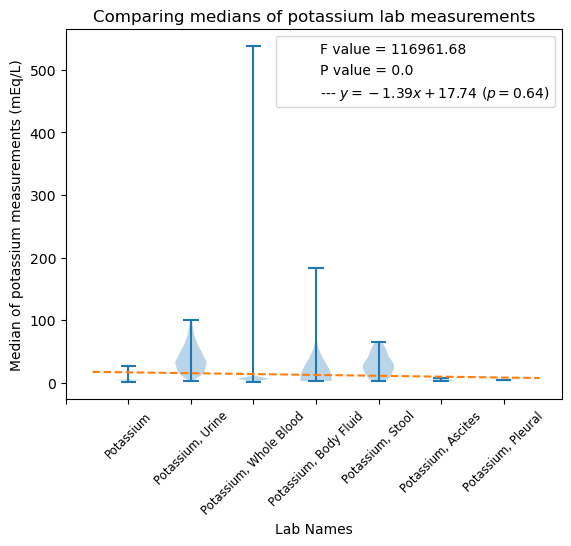

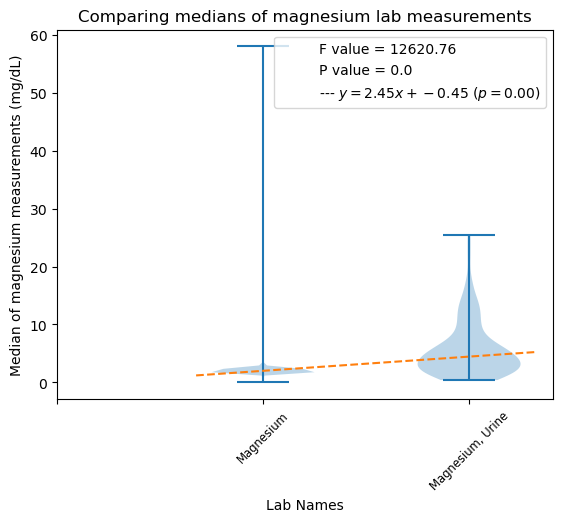

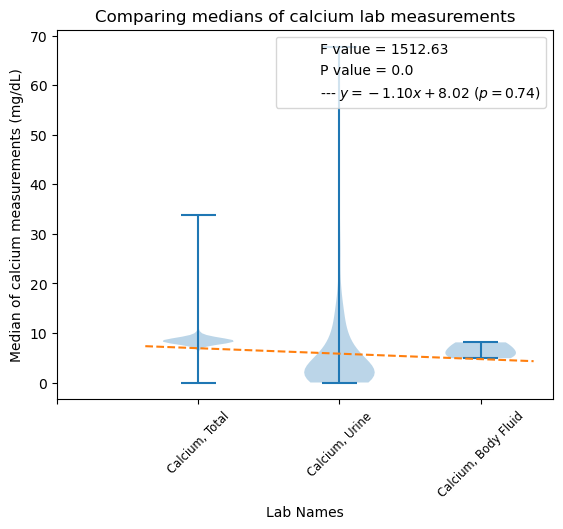

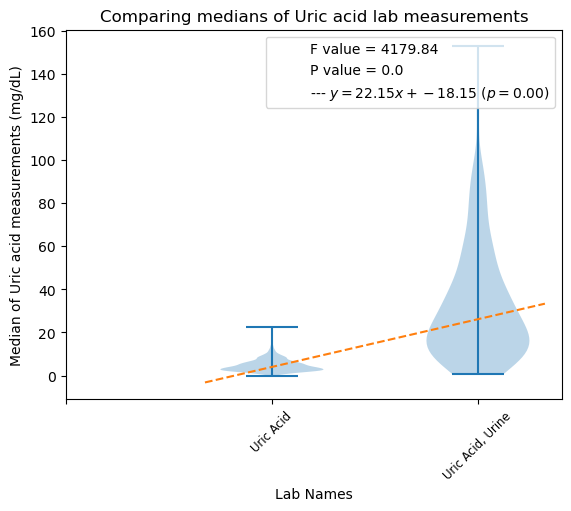

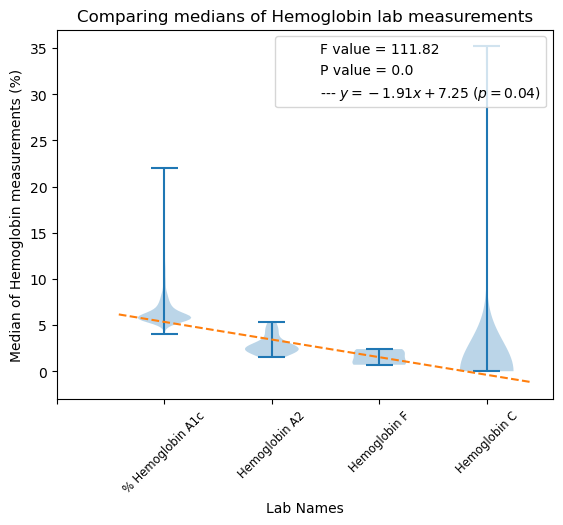

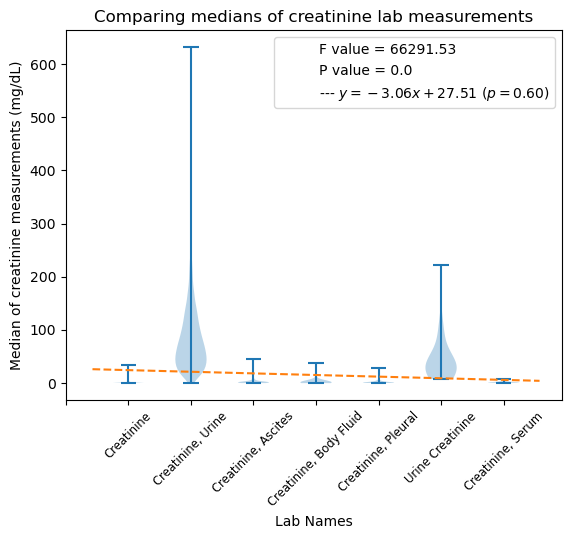

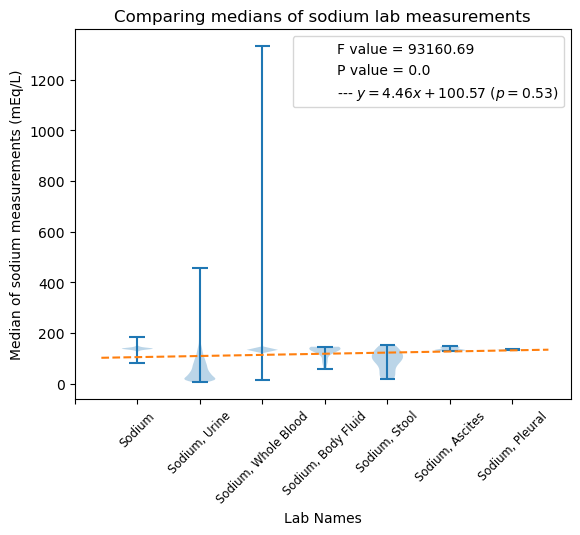

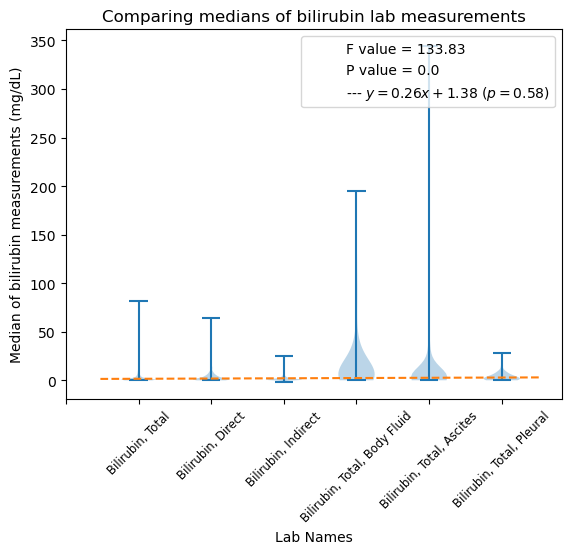

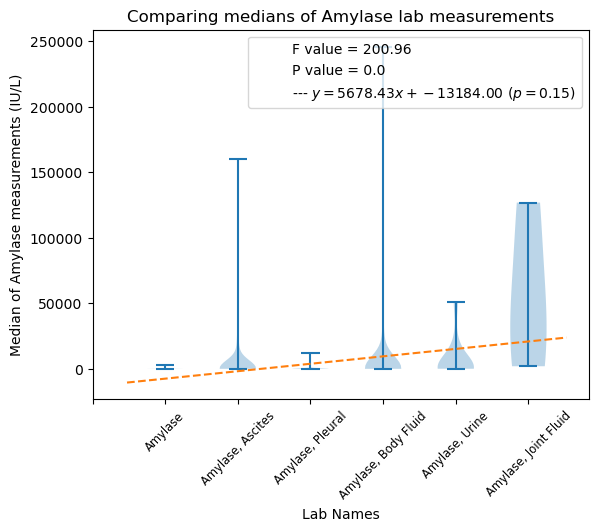

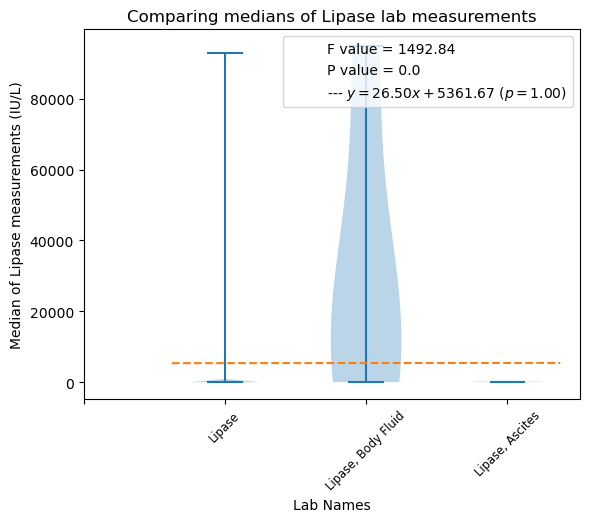

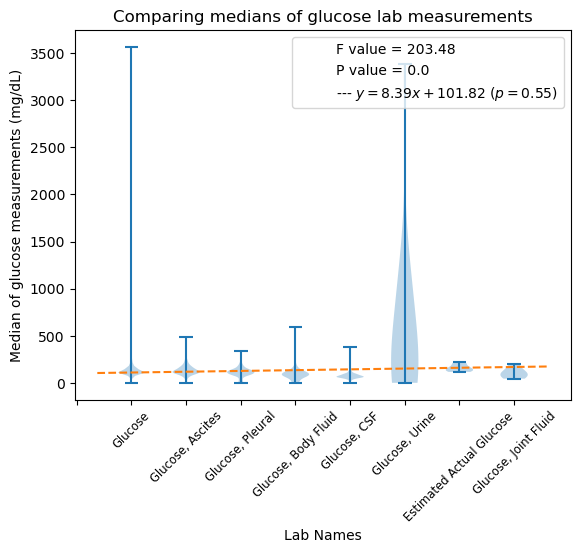

In [ ]:
import scipy.stats as stats
import numpy as np  # For the median
import matplotlib.pyplot as plt  # For the plot
from matplotlib.patches import Rectangle
import pickle

# pickle.dump(v_r_lab_dict, open(os.path.join(data, "mapping_lab_itemids.pkl"), "wb"))
t_v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
labs_data = {}
for lab, mimic_data in v_r_lab_dict.items():
    itemids = [k[1] for k in list(mimic_data.keys())]
    labs_data[lab.strip()] = labs[labs.ITEMID.isin(itemids)]
    if labs_data[lab.strip()].shape[0]==0:
        del labs_data[lab.strip()]
    else:
        print(f"Lab: {lab}")

res_dict_anova = {}
res_list = []
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
for lab, mimic_data in labs_data.items():
    t_lab_filter = mimic_data[["VALUE", "LABEL", "VALUEUOM"]]
    t = []
    units = []
    for lab1 in t_lab_filter.LABEL.unique():
        temp = t_lab_filter.set_index("LABEL").loc[lab1]
        t.append(temp[["VALUE"]])
        units.append(temp["VALUEUOM"].unique()[0])
    
    if len(t)>1:
        fvalue, pvalue = stats.f_oneway(*t)
        res_dict_anova[lab.strip()] = (fvalue, pvalue)


        # The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic
        # Fit line to median of distributions
        data = [d.reset_index()["VALUE"] for d in t]
        x_labels = [d.reset_index()["LABEL"].unique()[0] for d in t]
        x = range(1, len(data) + 1)
        y = [np.median(sample) for sample in t]
        slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

        def line(x):
            """The regression line"""
            return slope * x + intercept

        plt.figure()
        plt.violinplot(data)
        x1, x2 = plt.xlim()
        plt.plot((x1, x2), (line(x1), line(x2)), '--')
        extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
        plt.legend([extra for i in range(3)], (f"F value = {res_dict_anova[lab.strip()][0][0].round(2)}", f"P value = {res_dict_anova[lab.strip()][1][0].round(2)}", "--- $y = {0:.2f}x + {1:.2f}$ ($p={2:.2f}$)".format(slope,intercept,p_val) ), loc=1)
        plt.title(f"Comparing medians of {lab} lab measurements")
        x_labels.insert(0, "")
        plt.xticks(range(len(x_labels)), x_labels, size='small', rotation=45)
        plt.xlabel(f"Lab Names")
        plt.ylabel(f"Median of {lab} measurements ({units[0]})")
        
        if res_dict_anova[lab.strip()][1][0] <= 0.01 and p_val > 0.01:
            res_list.append(lab)

res_lab_itemids = {k[1]:lab for lab in res_list for k, v in v_r_lab_dict[lab].items() }
labs = labs["MIMICExtractName"] = labs.apply(lambda r: res_lab_itemids[r["ITEMID"]] if r["ITEMID"] in res_lab_itemids else r["LABEL"], axis=1)

In [ ]:
res_dict_anova

{'potassium': (array([116961.68292518]), array([0.])),
 'magnesium': (array([12620.75508404]), array([0.])),
 'calcium': (array([1512.63308512]), array([0.])),
 'Uric acid': (array([4179.84473066]), array([0.])),
 'Hemoglobin': (array([111.82009682]), array([1.27485467e-68])),
 'creatinine': (array([66291.53166399]), array([0.])),
 'sodium': (array([93160.69377392]), array([0.])),
 'bilirubin': (array([133.8324682]), array([1.06956347e-141])),
 'Amylase': (array([200.9619823]), array([1.62384902e-205])),
 'Lipase': (array([1492.84331086]), array([0.])),
 'glucose': (array([203.47868066]), array([1.23474193e-302]))}

In [ ]:
res_lab_itemids = {k[1]:lab for lab in res_list for k, v in v_r_lab_dict[lab].items() }

In [ ]:
res_lab_itemids

{50971: 'potassium',
 50847: 'potassium',
 51041: 'potassium',
 51057: 'potassium',
 51064: 'potassium',
 51097: 'potassium',
 50822: 'potassium',
 51029: 'calcium',
 50893: 'calcium',
 51077: 'calcium',
 50852: 'Hemoglobin',
 51223: 'Hemoglobin',
 51224: 'Hemoglobin',
 51225: 'Hemoglobin',
 50912: 'creatinine',
 50841: 'creatinine',
 51032: 'creatinine',
 51052: 'creatinine',
 51081: 'creatinine',
 51082: 'creatinine',
 51106: 'creatinine',
 50983: 'sodium',
 50848: 'sodium',
 51042: 'sodium',
 51058: 'sodium',
 51065: 'sodium',
 51100: 'sodium',
 50824: 'sodium',
 50883: 'bilirubin',
 50884: 'bilirubin',
 50885: 'bilirubin',
 50838: 'bilirubin',
 51028: 'bilirubin',
 51049: 'bilirubin',
 50867: 'Amylase',
 50836: 'Amylase',
 51026: 'Amylase',
 51020: 'Amylase',
 51047: 'Amylase',
 51072: 'Amylase',
 50956: 'Lipase',
 50844: 'Lipase',
 51036: 'Lipase',
 51529: 'glucose',
 50809: 'glucose',
 50931: 'glucose',
 51478: 'glucose',
 50842: 'glucose',
 51034: 'glucose',
 51014: 'glucose',
 

In [ ]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [ ]:
labs["MIMICExtractName"] = labs.apply(lambda r: res_lab_itemids[r["ITEMID"]] if r["ITEMID"] in res_lab_itemids else r["LABEL"], axis=1)

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_39050/4269533444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labs["MIMICExtractName"] = labs.apply(lambda r: res_lab_itemids[r["ITEMID"]] if r["ITEMID"] in res_lab_itemids else r["LABEL"], axis=1)


In [ ]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE,MIMICExtractName
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,PT
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,Anion Gap
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,Hematocrit
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,Basophils
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,Eosinophils
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,PTT
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,INR(PT)
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,PT
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0,Hematocrit
